In [1]:
# import packages
import os
import warnings

import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rxr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
warnings.simplefilter('ignore')

# Get the MODIS data
et.data.get_data("cold-springs-modis-h4")

# This download contains the fire boundary
et.data.get_data('cold-springs-fire')

'C:\\Users\\fnasr\\earth-analytics\\data\\cold-springs-fire\\.'

In [2]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 
                      'earth-analytics',
                      'data'))

## Hierarchical Data Formats - HDF4 - EOS in Python


In [3]:
# Create a path to the pre-fire MODIS h4 data
modis_pre_path = os.path.join('cold-springs-modis-h4', 
                             '07_july_2016',
                             'MOD09GA.A2016189.h09v05.006.2016191073856.hdf')
modis_pre_path

'cold-springs-modis-h4\\07_july_2016\\MOD09GA.A2016189.h09v05.006.2016191073856.hdf'

## Open HDF4 Files Using Open Source Python and Xarray


In [4]:
# Open data with rioxarray
modis_pre = rxr.open_rasterio(modis_pre_path, masked=True)

type(modis_pre)

list

In [5]:
len(modis_pre)

2

In [6]:
# This is just a data exploration step
modis_pre_qa = modis_pre[0]
modis_pre_qa

<xarray.Dataset>
Dimensions:               (y: 1200, x: 1200, band: 1)
Coordinates:
  * y                     (y) float64 4.447e+06 4.446e+06 ... 3.336e+06
  * x                     (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
  * band                  (band) int32 1
    spatial_ref           int32 0
Data variables:
    num_observations_1km  (band, y, x) float32 ...
    granule_pnt_1         (band, y, x) float32 ...
    state_1km_1           (band, y, x) float32 ...
    SensorZenith_1        (band, y, x) float32 ...
    SensorAzimuth_1       (band, y, x) float32 ...
    Range_1               (band, y, x) float32 ...
    SolarZenith_1         (band, y, x) float32 ...
    SolarAzimuth_1        (band, y, x) float32 ...
    gflags_1              (band, y, x) float32 ...
    orbit_pnt_1           (band, y, x) float32 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [7]:
modis_pre_qa["num_observations_1km"]

<xarray.DataArray 'num_observations_1km' (band: 1, y: 1200, x: 1200)>
[1440000 values with dtype=float32]
Coordinates:
  * y            (y) float64 4.447e+06 4.446e+06 ... 3.337e+06 3.336e+06
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.897e+06 -8.896e+06
  * band         (band) int32 1
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     Number of Observations
    units:         none

In [8]:
# Reflectance data
modis_pre_bands = modis_pre[1]
modis_pre_bands

<xarray.Dataset>
Dimensions:                (y: 2400, x: 2400, band: 1)
Coordinates:
  * y                      (y) float64 4.448e+06 4.447e+06 ... 3.336e+06
  * x                      (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
  * band                   (band) int32 1
    spatial_ref            int32 0
Data variables:
    num_observations_500m  (band, y, x) float32 ...
    sur_refl_b01_1         (band, y, x) float32 ...
    sur_refl_b02_1         (band, y, x) float32 ...
    sur_refl_b03_1         (band, y, x) float32 ...
    sur_refl_b04_1         (band, y, x) float32 ...
    sur_refl_b05_1         (band, y, x) float32 ...
    sur_refl_b06_1         (band, y, x) float32 ...
    sur_refl_b07_1         (band, y, x) float32 ...
    QC_500m_1              (band, y, x) float64 ...
    obscov_500m_1          (band, y, x) float32 ...
    iobs_res_1             (band, y, x) float32 ...
    q_scan_1               (band, y, x) float32 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [9]:
# Use rasterio to print all of the subdataset names in the data
# Here you can see the group names: MODIS_Grid_500m_2D & MODIS_Grid_1km_2D
import rasterio as rio
with rio.open(modis_pre_path) as groups:
    for name in groups.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_1km_2D:num_observations_1km
HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_1km_2D:granule_pnt_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:num_observations_500m
HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b01_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b02_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b03_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09GA.A2016189.h09v05.006.2016191073856.hdf:MODIS_Grid_500m_2D:sur_refl_b04_1
HDF4_EOS:EOS_GRID:cold-springs-modis-h4\07_july_2016\MOD09G

## Subset Data By Group or Variable


In [10]:
#  Subset by group only - Notice you have all bands in the returned object
rxr.open_rasterio(modis_pre_path, 
                  masked=True, 
                  group="MODIS_Grid_500m_2D").squeeze()

<xarray.Dataset>
Dimensions:                (y: 2400, x: 2400)
Coordinates:
  * y                      (y) float64 4.448e+06 4.447e+06 ... 3.336e+06
  * x                      (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06
    band                   int32 1
    spatial_ref            int32 0
Data variables:
    num_observations_500m  (y, x) float32 ...
    sur_refl_b01_1         (y, x) float32 ...
    sur_refl_b02_1         (y, x) float32 ...
    sur_refl_b03_1         (y, x) float32 ...
    sur_refl_b04_1         (y, x) float32 ...
    sur_refl_b05_1         (y, x) float32 ...
    sur_refl_b06_1         (y, x) float32 ...
    sur_refl_b07_1         (y, x) float32 ...
    QC_500m_1              (y, x) float64 ...
    obscov_500m_1          (y, x) float32 ...
    iobs_res_1             (y, x) float32 ...
    q_scan_1               (y, x) float32 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [11]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]

# Notice that here, you get a single xarray object with just the bands that
# you want to work with
modis_pre_bands = rxr.open_rasterio(modis_pre_path,
                                   variable=desired_bands).squeeze()

modis_pre_bands

<xarray.Dataset>
Dimensions:         (y: 2400, x: 2400)
Coordinates:
  * y               (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x               (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band            int32 1
    spatial_ref     int32 0
Data variables:
    sur_refl_b01_1  (y, x) int16 ...
    sur_refl_b02_1  (y, x) int16 ...
    sur_refl_b03_1  (y, x) int16 ...
    sur_refl_b04_1  (y, x) int16 ...
    sur_refl_b07_1  (y, x) int16 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [12]:
#  view nodata value
modis_pre_bands.sur_refl_b01_1.rio.nodata

-28672

## Handle NoData Using Masked=True


In [13]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]

# Notice that here, you get a single xarray object with just the bands that
# you want to work with
modis_pre_bands = rxr.open_rasterio(modis_pre_path,
                                    masked=True,
                                   variable=desired_bands).squeeze()

modis_pre_bands

<xarray.Dataset>
Dimensions:         (y: 2400, x: 2400)
Coordinates:
  * y               (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x               (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band            int32 1
    spatial_ref     int32 0
Data variables:
    sur_refl_b01_1  (y, x) float32 ...
    sur_refl_b02_1  (y, x) float32 ...
    sur_refl_b03_1  (y, x) float32 ...
    sur_refl_b04_1  (y, x) float32 ...
    sur_refl_b07_1  (y, x) float32 ...
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [14]:
modis_pre_bands.sur_refl_b01_1.rio.nodata

nan

## Process MODIS Bands Stored in a HDF4 File


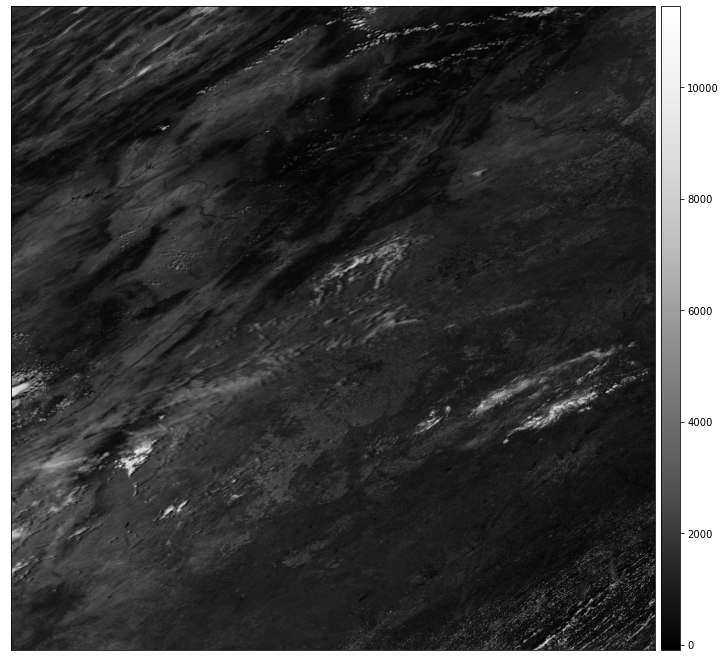

In [15]:
# Plot band one of the data
ep.plot_bands(modis_pre_bands.sur_refl_b01_1)
plt.show()

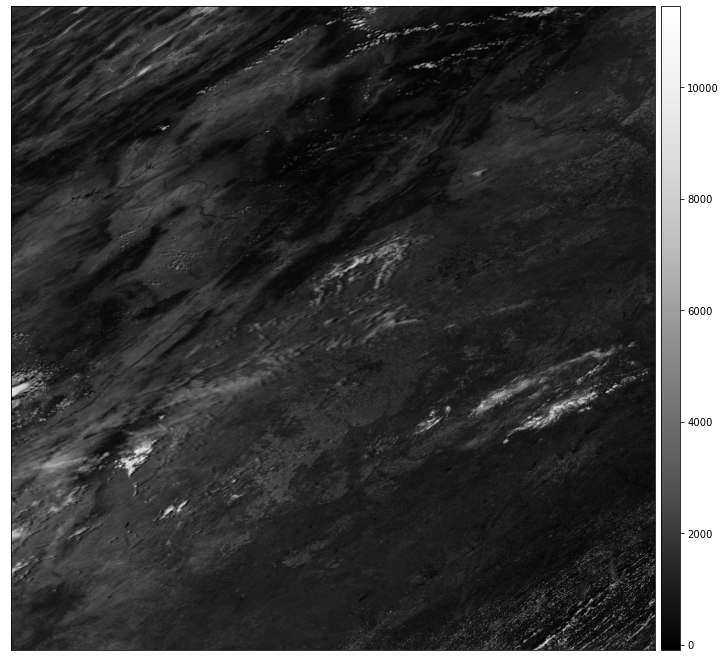

In [16]:
ep.plot_bands(modis_pre_bands["sur_refl_b01_1"])
plt.show()

## Plot All MODIS Bands with EarthPy

In [17]:
print(type(modis_pre_bands))
print(type(modis_pre_bands.to_array()))

# You can plot each band easily using a data array object
modis_pre_bands.to_array()

<class 'xarray.core.dataset.Dataset'>
<class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray (variable: 5, y: 2400, x: 2400)>
array([[[1902., 1949., 1947., ..., 1327., 1327., 1181.],
        [1949., 2160., 2095., ..., 1327., 1273., 1273.],
        [2054., 2156., 2187., ..., 1139., 1101., 1206.],
        ...,
        [1387., 1469., 1469., ...,  343.,  499., 1006.],
        [1298., 1316., 1469., ...,  905.,  499.,  436.],
        [1316., 1316., 1454., ...,  905.,  578.,  351.]],

       [[2714., 2859., 3041., ..., 3046., 3046., 4421.],
        [2968., 3362., 3253., ..., 3046., 4550., 4550.],
        [3198., 3315., 3246., ..., 4178., 4017., 3992.],
        ...,
        [2911., 2947., 2947., ..., 4059., 4907., 3799.],
        [2954., 2890., 2947., ..., 4517., 4907., 3459.],
        [2890., 2890., 2935., ..., 4517., 3728., 4021.]],

       [[1056., 1072., 1012., ...,  745.,  745.,  581.],
        [1051., 1150., 1039., ...,  745.,  595.,  595.],
        [1073., 1220., 1152., ...,  588.,  564.,  563.],
        ...,
        [ 759.,  813.,  813., ...,  150.,  218.,  852.],
        [ 703.,  735.,  813., ...,  585.,  218.,  199.],
        [ 735.,  735.,  798., ...,  585.,  338.,  109.]],

       [[1534., 1567., 1527., ..., 1107., 1107., 1069.],
        [1548., 1776., 1665., ..., 1107., 1121., 1121.],
        [1696., 1813., 1820., ..., 1029., 1018., 1077.],
        ...,
        [1209., 1267., 1267., ...,  597.,  788., 1153.],
        [1165., 1154., 1267., ..., 1089.,  788.,  603.],
        [1154., 1154., 1231., ..., 1089.,  759.,  516.]],

       [[2781., 2692., 2801., ..., 2260., 2260., 1534.],
        [2792., 2705., 2684., ..., 2260., 1449., 1449.],
        [2747., 2754., 2733., ..., 1713., 1802., 1548.],
        ...,
        [2457., 2446., 2446., ...,  444.,  832., 1379.],
        [2289., 2296., 2446., ..., 1161.,  832.,  762.],
        [2296., 2296., 2511., ..., 1161.,  913.,  703.]]], dtype=float32)
Coordinates:
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band         int32 1
    spatial_ref  int32 0
  * variable     (variable) <U14 'sur_refl_b01_1' ... 'sur_refl_b07_1'
Attributes:
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:   No automatic quality assessment is p...
    CHARACTERISTICBINANGULARSIZE1KM:     30.0
    CHARACTERISTICBINANGULARSIZE500M:    15.0
    CHARACTERISTICBINSIZE1KM:            926.625433055556
    CHARACTERISTICBINSIZE500M:           463.312716527778
    CLOUDOPTION:                         MOD09 internally-derived
    COVERAGECALCULATIONMETHOD:           volume
    COVERAGEMINIMUM:                     0.00999999977648258
    DATACOLUMNS1KM:                      1200
    DATACOLUMNS500M:                     2400
    DATAROWS1KM:                         1200
    DATAROWS500M:                        2400
    DAYNIGHTFLAG:                        Day
    DEEPOCEANFLAG:                       Yes
    DESCRREVISION:                       6.1
    EASTBOUNDINGCOORDINATE:              -92.3664205550513
    EQUATORCROSSINGDATE.1:               2016-07-07
    EQUATORCROSSINGDATE.2:               2016-07-07
    EQUATORCROSSINGLONGITUDE.1:          -103.273195919522
    EQUATORCROSSINGLONGITUDE.2:          -127.994803619317
    EQUATORCROSSINGTIME.1:               17:23:36.891214
    EQUATORCROSSINGTIME.2:               19:02:29.990629
    EXCLUSIONGRINGFLAG.1:                N
    FIRSTLAYERSELECTIONCRITERIA:         order of input pointer
    GEOANYABNORMAL:                      False
    GEOESTMAXRMSERROR:                   50.0
    GLOBALGRIDCOLUMNS1KM:                43200
    GLOBALGRIDCOLUMNS500M:               86400
    GLOBALGRIDROWS1KM:                   21600
    GLOBALGRIDROWS500M:                  43200
    GRANULE

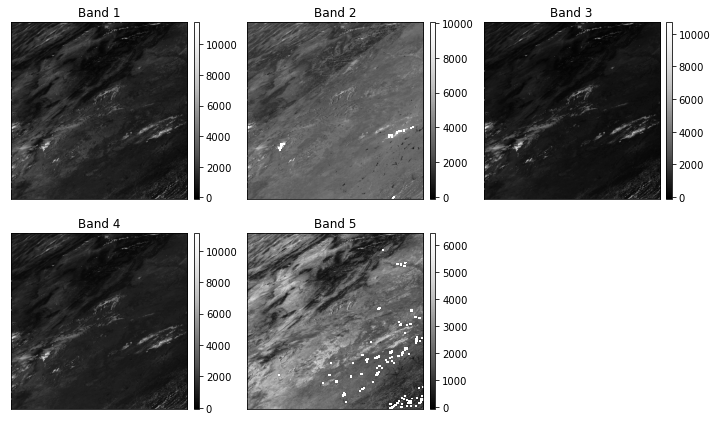

In [18]:
# Plot the data as a DataArray
# This is only a data exploration step
ep.plot_bands(modis_pre_bands.to_array().values,
              figsize=(10,6))

plt.show()

## RGB Image of MODIS Data Using EarthPy

In [19]:
# Select the rgb bands only
rgb_bands = ['sur_refl_b01_1',
             'sur_refl_b03_1',
             'sur_refl_b04_1']

# Turn the data into a DataArray
modis_rgb_xr = modis_pre_bands[rgb_bands].to_array()
modis_rgb_xr

<xarray.DataArray (variable: 3, y: 2400, x: 2400)>
array([[[1902., 1949., 1947., ..., 1327., 1327., 1181.],
        [1949., 2160., 2095., ..., 1327., 1273., 1273.],
        [2054., 2156., 2187., ..., 1139., 1101., 1206.],
        ...,
        [1387., 1469., 1469., ...,  343.,  499., 1006.],
        [1298., 1316., 1469., ...,  905.,  499.,  436.],
        [1316., 1316., 1454., ...,  905.,  578.,  351.]],

       [[1056., 1072., 1012., ...,  745.,  745.,  581.],
        [1051., 1150., 1039., ...,  745.,  595.,  595.],
        [1073., 1220., 1152., ...,  588.,  564.,  563.],
        ...,
        [ 759.,  813.,  813., ...,  150.,  218.,  852.],
        [ 703.,  735.,  813., ...,  585.,  218.,  199.],
        [ 735.,  735.,  798., ...,  585.,  338.,  109.]],

       [[1534., 1567., 1527., ..., 1107., 1107., 1069.],
        [1548., 1776., 1665., ..., 1107., 1121., 1121.],
        [1696., 1813., 1820., ..., 1029., 1018., 1077.],
        ...,
        [1209., 1267., 1267., ...,  597.,  788., 1153.],
        [1165., 1154., 1267., ..., 1089.,  788.,  603.],
        [1154., 1154., 1231., ..., 1089.,  759.,  516.]]], dtype=float32)
Coordinates:
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
  * x            (x) float64 -1.001e+07 -1.001e+07 ... -8.896e+06 -8.896e+06
    band         int32 1
    spatial_ref  int32 0
  * variable     (variable) <U14 'sur_refl_b01_1' ... 'sur_refl_b04_1'
Attributes:
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:   No automatic quality assessment is p...
    CHARACTERISTICBINANGULARSIZE1KM:     30.0
    CHARACTERISTICBINANGULARSIZE500M:    15.0
    CHARACTERISTICBINSIZE1KM:            926.625433055556
    CHARACTERISTICBINSIZE500M:           463.312716527778
    CLOUDOPTION:                         MOD09 internally-derived
    COVERAGECALCULATIONMETHOD:           volume
    COVERAGEMINIMUM:                     0.00999999977648258
    DATACOLUMNS1KM:                      1200
    DATACOLUMNS500M:                     2400
    DATAROWS1KM:                         1200
    DATAROWS500M:                        2400
    DAYNIGHTFLAG:                        Day
    DEEPOCEANFLAG:                       Yes
    DESCRREVISION:                       6.1
    EASTBOUNDINGCOORDINATE:              -92.3664205550513
    EQUATORCROSSINGDATE.1:               2016-07-07
    EQUATORCROSSINGDATE.2:               2016-07-07
    EQUATORCROSSINGLONGITUDE.1:          -103.273195919522
    EQUATORCROSSINGLONGITUDE.2:          -127.994803619317
    EQUATORCROSSINGTIME.1:               17:23:36.891214
    EQUATORCROSSINGTIME.2:               19:02:29.990629
    EXCLUSIONGRINGFLAG.1:                N
    FIRSTLAYERSELECTIONCRITERIA:         order of input pointer
    GEOANYABNORMAL:                      False
    GEOESTMAXRMSERROR:                   50.0
    GLOBALGRIDCOLUMNS1KM:                43200
    GLOBALGRIDCOLUMNS500M:               86400
    GLOBALGRIDROWS1KM:                   21600
    GLOBALGRIDROWS500M:                  43200
    GRANULEBEGINNINGDATETIME:            2016-07-07T17:10:00.000000Z
    GRANULEBEGINNINGDATETIMEARRAY:       2016-07-07T17:10:00.000000Z, 2016-07...
    GRANULEDAYNIGHTFLAG:                 Day
    GRANULEDAYNIGHTFLAGARRAY:            Day, Day, Day, Day
    GRANULEDAYOFYEAR:                    189
    GRANULEENDINGDATETIME:               2016-07-07T18:55:00.000000Z
    GRANULEENDINGDATETIMEARRAY:          2016-07-07T17:15:00.000000Z, 2016-07...
    GRANULENUMBERARRAY:                  208, 209, 228, 247, -1, -1, -1, -1, ...
    GRANULEPOINTERARRAY:                 0, 1, 2, -1, -1, -1, -1, -1, -1, -1,...
    GRINGPOINTLATITUDE.1:                29.8360532722546, 39.9999999964079, ...
    GRINGPOINTLONGITUDE.1:      

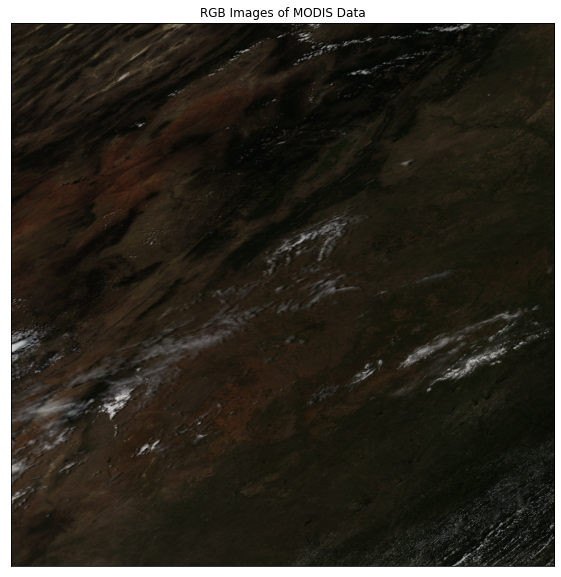

In [20]:
# Plot MODIS RGB numpy image array
ep.plot_rgb(modis_rgb_xr.values,
           rgb=[0, 2, 1],
           title='RGB Images of MODIS Data')
plt.show()

## Crop (Clip) MODIS Data Using Rioxarray


In [21]:
# Open fire boundary
fire_boundary_path = os.path.join('cold-springs-fire',
                                 'vector_layers',
                                 'fire-boundary-geomac',
                                 'co_cold_springs_20160711_2200_dd83.shp')

fire_boundary = gpd.read_file(fire_boundary_path)

# Check the CRS of your study area extent
fire_boundary.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Reproject the Clip Extent (Fire Boundary)


In [22]:
# Check CRS
if not fire_boundary.crs == modis_rgb_xr.rio.crs:
    # if the crs is not equal reproject the data
      fire_bound_sin = fire_boundary.to_crs(modis_rgb_xr.rio.crs)

fire_bound_sin.crs

<Derived Projected CRS: PROJCS["unnamed",GEOGCS["Unknown datum based upon  ...>
Name: unnamed
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Sinusoidal
Datum: Not specified (based on custom spheroid)
- Ellipsoid: Custom spheroid
- Prime Meridian: Greenwich

## Scenario 1: Open and Clip the Data Using the CRS=Parameter


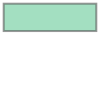

In [23]:
# Notice this is a box - representing the spatial extent
# of your study area
crop_bound_box = [box(*fire_boundary.total_bounds)]
crop_bound_box[0]

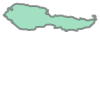

In [24]:
# Notice that this is the actual shape of the fire boundary
# First you need to decide whether you want to clip to the
# Box /  extent (above) or the shape that you see here.
fire_boundary.geometry[0]

In [25]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]

#  Create a box representing the spatial extent of your data
crop_bound_box = [box(*fire_boundary.total_bounds)]

# Clip the data by  chaining together rio.clip with rio.open_rasterio
# from_disk=True allows you to only open the data that you wish to work with
modis_pre_clip = rxr.open_rasterio(modis_pre_path,
                                  masked=True,
                                  variable=desired_bands).rio.clip(crop_bound_box,
                                                                  crs=fire_boundary.crs,
                                                                  # Include all pixels even partial pixels
                                                                  all_touched=True,
                                                                  from_disk=True).squeeze()
# The final clipped data
modis_pre_clip

<xarray.Dataset>
Dimensions:         (y: 3, x: 12)
Coordinates:
  * y               (y) float64 4.446e+06 4.446e+06 4.445e+06
  * x               (x) float64 -8.989e+06 -8.989e+06 ... -8.985e+06 -8.984e+06
    band            int32 1
    spatial_ref     int32 0
Data variables:
    sur_refl_b01_1  (y, x) float32 nan nan 428.0 450.0 ... 458.0 nan nan nan
    sur_refl_b02_1  (y, x) float32 nan nan 3.013e+03 2.809e+03 ... nan nan nan
    sur_refl_b03_1  (y, x) float32 nan nan 259.0 235.0 ... 265.0 nan nan nan
    sur_refl_b04_1  (y, x) float32 nan nan 563.0 541.0 ... 518.0 nan nan nan
    sur_refl_b07_1  (y, x) float32 nan nan 832.0 820.0 ... 804.0 nan nan nan
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

In [26]:
# For demonstration purpposes  i'm creating a plotting extent
from rasterio.plot import plotting_extent

modis_ext = plotting_extent(modis_pre_clip.to_array().values[0],
                            modis_pre_clip.rio.transform())

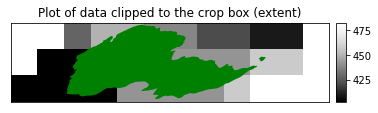

In [27]:
# View cropped data
f, ax = plt.subplots()
ep.plot_bands(modis_pre_clip.to_array().values[0],
              ax=ax,
              extent=modis_ext,
              title="Plot of data clipped to the crop box (extent)")
fire_bound_sin.plot(ax=ax,
                    color="green")
plt.show()

## Scenario 2: Crop Using the GEOMETRY


In [28]:
# Open just the bands that you want to process
desired_bands = ["sur_refl_b01_1",
                 "sur_refl_b02_1",
                 "sur_refl_b03_1",
                 "sur_refl_b04_1",
                 "sur_refl_b07_1"]

#  Create a box representing the spatial extent of your data
crop_bound_box = [box(*fire_boundary.total_bounds)]

# Clip the data by  chaining together rio.clip with rio.open_rasterio
# from_disk=True allows you to only open the data that you wish to work with
modis_pre_clip_geom = rxr.open_rasterio(modis_pre_path,
                                       masked=True,
                                       variable=desired_bands).rio.clip(fire_boundary.geometry.apply(mapping),
                                                                       crs=fire_boundary.crs,
                                                                       # Include all pixels even partial pixels
                                                                       all_touched=True,
                                                                       from_disk=True).squeeze()

# The final clipped data  -  Notice there are fewer pixels
# In the output object
modis_pre_clip_geom

<xarray.Dataset>
Dimensions:         (y: 3, x: 8)
Coordinates:
  * y               (y) float64 4.446e+06 4.446e+06 4.445e+06
  * x               (x) float64 -8.988e+06 -8.988e+06 ... -8.986e+06 -8.985e+06
    band            int32 1
    spatial_ref     int32 0
Data variables:
    sur_refl_b01_1  (y, x) float32 428.0 450.0 450.0 438.0 ... 442.0 458.0 nan
    sur_refl_b02_1  (y, x) float32 3.013e+03 2.809e+03 ... 2.496e+03 nan
    sur_refl_b03_1  (y, x) float32 259.0 235.0 235.0 231.0 ... 230.0 265.0 nan
    sur_refl_b04_1  (y, x) float32 563.0 541.0 541.0 528.0 ... 476.0 518.0 nan
    sur_refl_b07_1  (y, x) float32 832.0 820.0 820.0 820.0 ... 789.0 804.0 nan
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

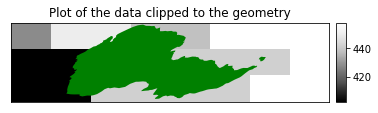

In [29]:
# View cropped data 
f, ax = plt.subplots()
ep.plot_bands(modis_pre_clip_geom.to_array().values[0],
             ax=ax,
             extent=modis_ext,
             title="Plot of the data clipped to the geometry")

fire_bound_sin.plot(ax=ax,
                   color="green")
plt.show()

## Scenario 3: Crop MODIS Data Using Reprojected Fire Boundary


In [30]:
# Get the crs from the dataset with es.crs_check
modis_bands_crs = es.crs_check(modis_pre_path)

# Reproject the fire boundary
fire_boundary_sin = fire_boundary.to_crs(modis_bands_crs)

# Open and crop the data with the box made from the reprojected fire boundary
modis_bands_clip = rxr.open_rasterio(modis_pre_path,
                                    masked=True,
                                    variable=desired_bands).rio.clip([box(*fire_bound_sin.total_bounds)],
                                                                    all_touched=True,
                                                                    from_disk=True).squeeze()

modis_bands_clip

<xarray.Dataset>
Dimensions:         (y: 3, x: 8)
Coordinates:
  * y               (y) float64 4.446e+06 4.446e+06 4.445e+06
  * x               (x) float64 -8.988e+06 -8.988e+06 ... -8.986e+06 -8.985e+06
    band            int32 1
    spatial_ref     int32 0
Data variables:
    sur_refl_b01_1  (y, x) float32 428.0 450.0 450.0 438.0 ... 442.0 458.0 458.0
    sur_refl_b02_1  (y, x) float32 3.013e+03 2.809e+03 ... 2.496e+03 2.496e+03
    sur_refl_b03_1  (y, x) float32 259.0 235.0 235.0 231.0 ... 230.0 265.0 265.0
    sur_refl_b04_1  (y, x) float32 563.0 541.0 541.0 528.0 ... 476.0 518.0 518.0
    sur_refl_b07_1  (y, x) float32 832.0 820.0 820.0 820.0 ... 789.0 804.0 804.0
Attributes: (12/136)
    ADDITIONALLAYERS1KM:                 11
    ADDITIONALLAYERS500M:                1
    ASSOCIATEDINSTRUMENTSHORTNAME.1:     MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:       Terra
    ASSOCIATEDSENSORSHORTNAME.1:         MODIS
    AUTOMATICQUALITYFLAG.1:              Passed
    ...                                  ...
    total_additional_observations_1km:   2705510
    total_additional_observations_500m:  660129
    VERSIONID:                           6
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -117.486656023174
    ZONEIDENTIFIER:                      Universal Transverse Mercator UTM

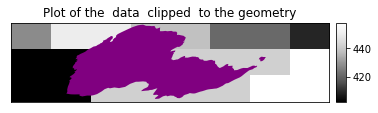

In [31]:
# View cropped data
f, ax = plt.subplots()
ep.plot_bands(modis_bands_clip.to_array().values[0],
              ax=ax,
              extent=modis_ext,
              title="Plot of the  data  clipped  to the geometry")
fire_bound_sin.plot(ax=ax,
                    color="purple")
plt.show()

In [32]:
def open_clean_bands(band_path, 
                    crop_layer,
                    variable=None):
    """ Open, subset and crop a MODIS h4 file.
    
    Parameters
    ----------
    band_path : string
        A path to the array to be opened.
    crop_layer : geopandas GeoDataFram
        a geopandas dataframe to be used to crop the raster using rioxarray clip().
    variable : List
        A list of variables to be opened from the raster.
        
    Return
    --------
    band : xarray DataArray
        Cropped xarray DataArray
    """
    
    crop_bound_box = [box(*crop_layer.total_bounds)]
    
    band = rxr.open_rasterio(band_path,
                            masked=True,
                            variable=variable).rio.clip(crop_bound_box,
                                                       crs=crop_layer.crs,
                                                       all_touched=True,
                                                       from_disk=True).squeeze()
    
    return band

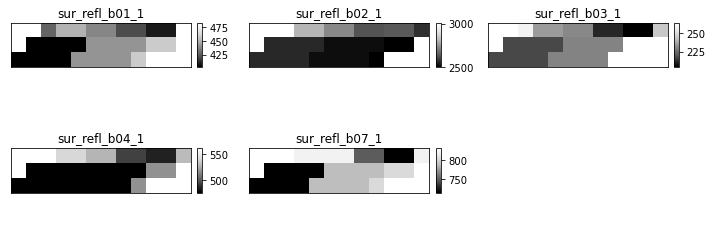

In [36]:
# Open bands with function
clean_bands = open_clean_bands(band_path=modis_pre_path,
                               crop_layer=fire_boundary,
                               variable=desired_bands)

# plot bands opened with function
ep.plot_bands(clean_bands.to_array().values,
             title=desired_bands,
             figsize=(10, 4))
plt.show()

## Export MODIS Data as a GeoTIFF

In [42]:
# Define path and file name for new tif file
stacked_file_path = os.path.join(os.path.dirname(modis_pre_path),
                                "final_output",
                                "modis_band_1.tif")

# Get the directory needed for the defined path
modis_dir_path = os.path.dirname(stacked_file_path)
print("Directory to save path:", modis_dir_path)



Directory to save path: cold-springs-modis-h4\07_july_2016\final_output
